In [97]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

C:\Users\Doha\AppData\Local\Temp\ipykernel_16520\1162196871.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?why

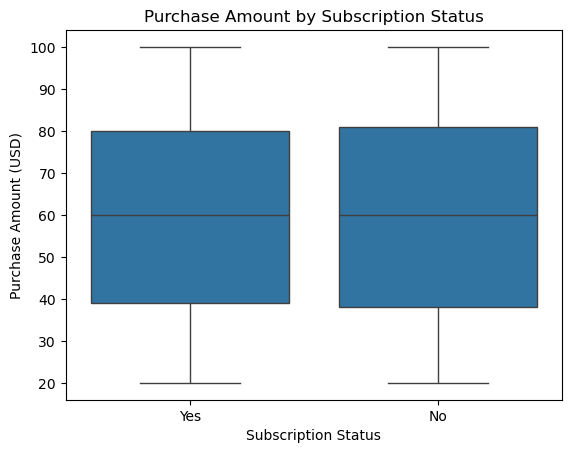

In [99]:
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.title("Purchase Amount by Subscription Status")
plt.show()


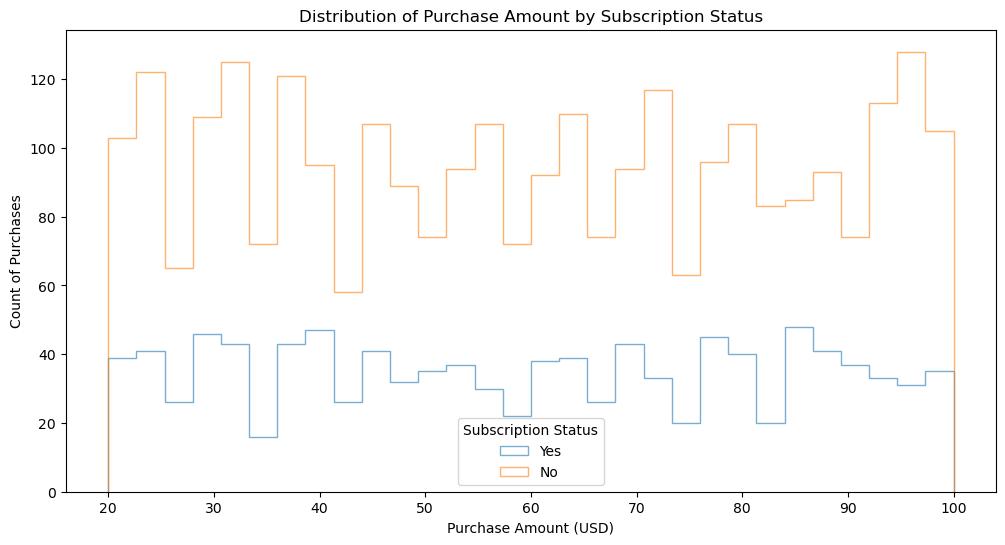

In [100]:
plt.figure(figsize=(12, 6))
for status in df['Subscription Status'].unique():
    subset = df[df['Subscription Status'] == status]
    plt.hist(subset['Purchase Amount (USD)'], alpha=0.6, label=status, histtype='step', bins=30)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count of Purchases')
plt.title("Distribution of Purchase Amount by Subscription Status")
plt.legend(title='Subscription Status')
plt.show()

In [101]:
for status in df['Subscription Status'].unique():
    subset = df[df['Subscription Status'] == status]
    Q1 = subset['Purchase Amount (USD)'].quantile(0.25)
    Q3 = subset['Purchase Amount (USD)'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = subset[(subset['Purchase Amount (USD)'] < Q1 - 1.5*IQR) | 
                      (subset['Purchase Amount (USD)'] > Q3 + 1.5*IQR)]
    print(f"{status}: {len(outliers)} outliers")

Yes: 0 outliers
No: 0 outliers


### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

In [102]:
payment_counts = df['Payment Method'].value_counts()
print(payment_counts)

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


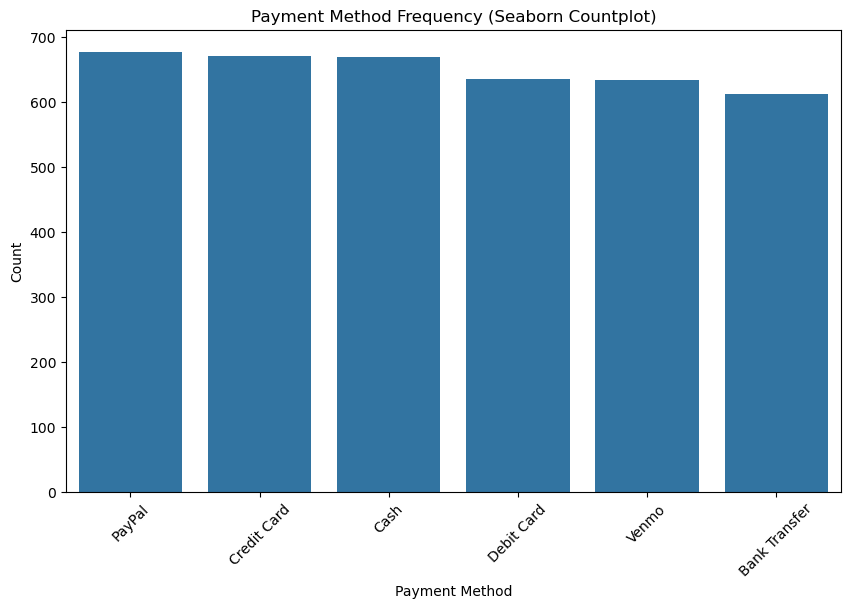

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment Method', order=df['Payment Method'].value_counts().index)
plt.title("Payment Method Frequency (Seaborn Countplot)")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

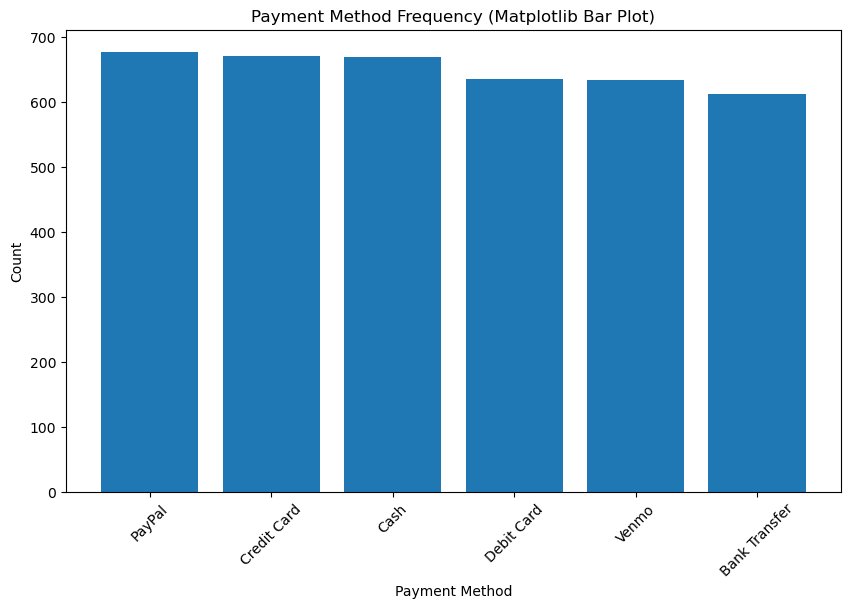

In [104]:
plt.figure(figsize=(10, 6))
payment_counts = df['Payment Method'].value_counts()
plt.bar(payment_counts.index, payment_counts.values)
plt.title("Payment Method Frequency (Matplotlib Bar Plot)")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

In [105]:
counts = df.groupby(["Gender", "Season"]).size()
print(counts)

Gender  Season
Female  Fall      328
        Spring    316
        Summer    298
        Winter    306
Male    Fall      647
        Spring    683
        Summer    657
        Winter    665
dtype: int64


C:\Users\Doha\AppData\Local\Temp\ipykernel_16520\3185183062.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Season")


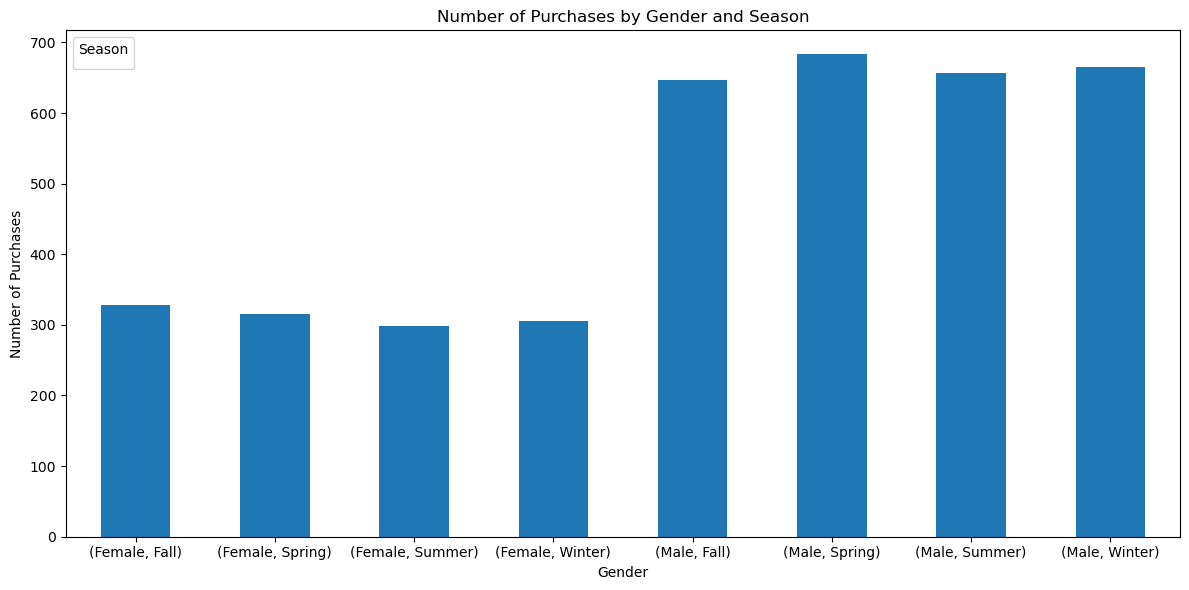

In [106]:
counts.plot(
    kind="bar",
    figsize=(12,6)
)

plt.title("Number of Purchases by Gender and Season")
plt.xlabel("Gender")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)
plt.legend(title="Season")
plt.tight_layout()
plt.show()


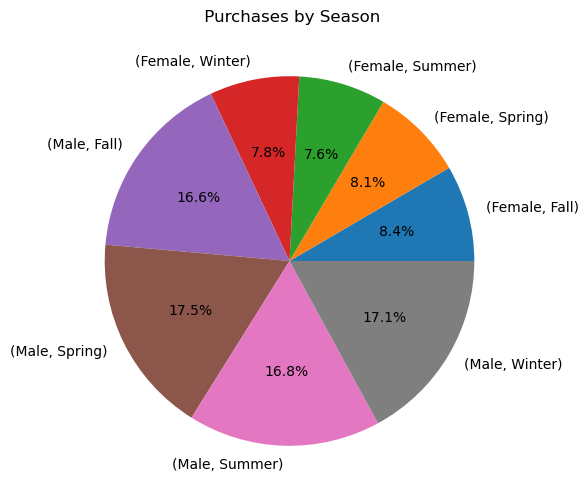

In [107]:
counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6),
    title=" Purchases by Season"
)

plt.ylabel("")
plt.show()


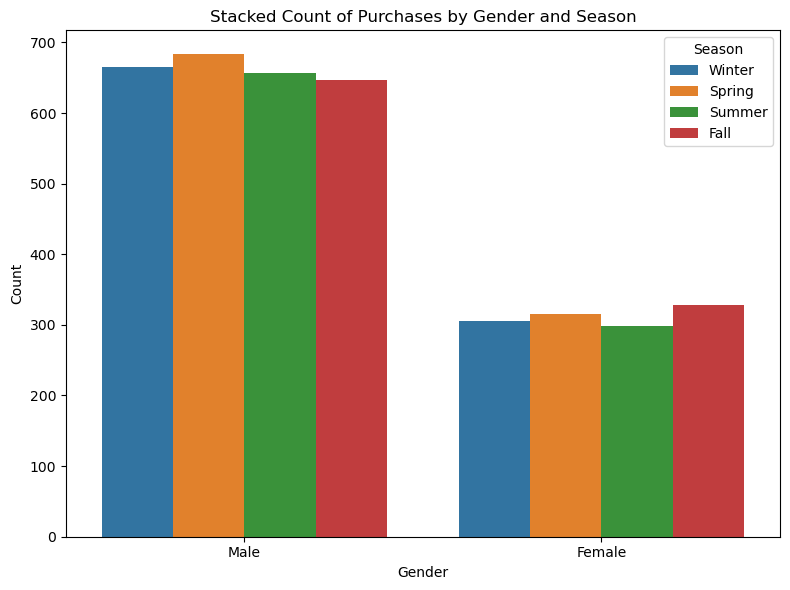

In [108]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="Gender",
    hue="Season"
)

plt.title("Stacked Count of Purchases by Gender and Season")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Season")
plt.tight_layout()
plt.show()


Question 4
Create a heatmap showing the correlation between all numeric columns.

Use sns.heatmap.
Interpret the relationship between Previous Purchases, Purchase Amount, and Review Rating.


In [109]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr = numeric_df.corr()

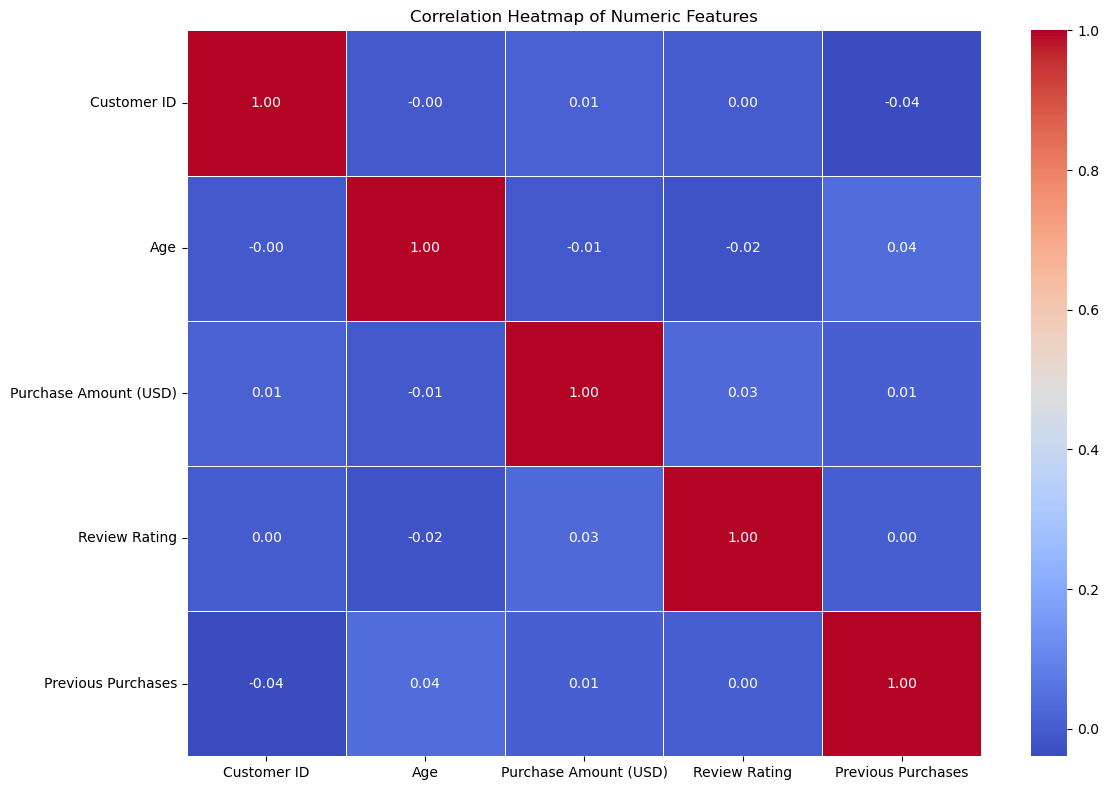

In [110]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

###### The correlation heatmap shows that Previous Purchases, Purchase Amount, and Review Rating have very weak correlations with each other

###### this indicates that the number of times a customer purchased before does not strongly influence how much they spend or how they rate their purchase

Question 5
Create a scatter plot of Age vs Purchase Amount (USD), color-coded by Gender.

Use Matplotlib and Seaborn side-by-side.
Add a trend line in Seaborn using regplot.

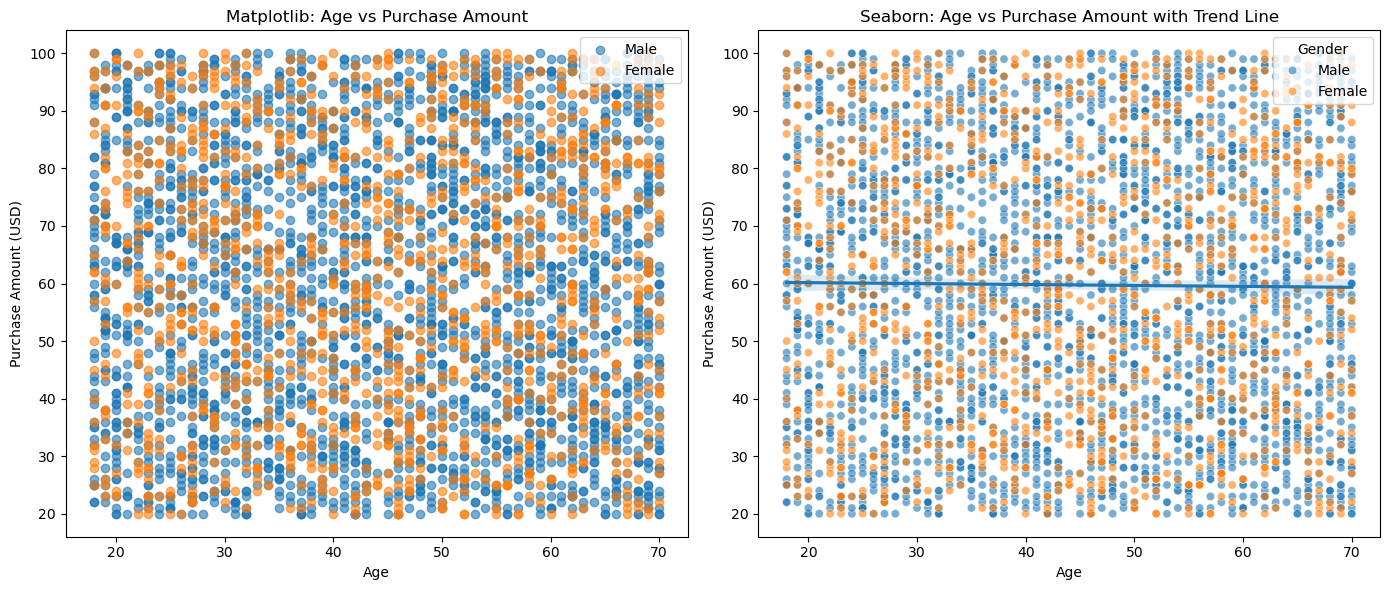

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) #side by side
male_df = df[df["Gender"] == "Male"]
female_df = df[df["Gender"] == "Female"]

axes[0].scatter(male_df["Age"], male_df["Purchase Amount (USD)"], label="Male", alpha=0.6)
axes[0].scatter(female_df["Age"], female_df["Purchase Amount (USD)"], label="Female", alpha=0.6)

axes[0].set_title("Matplotlib: Age vs Purchase Amount")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Purchase Amount (USD)")
axes[0].legend()


sns.scatterplot(
    data=df,
    x="Age",
    y="Purchase Amount (USD)",
    hue="Gender",
    alpha=0.6,
    ax=axes[1]
)


sns.regplot(
    data=df,
    x="Age",
    y="Purchase Amount (USD)",
    scatter=False,
    ax=axes[1]
)

axes[1].set_title("Seaborn: Age vs Purchase Amount with Trend Line")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Purchase Amount (USD)")

plt.tight_layout()
plt.show()

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

In [112]:
pivot_table = df.pivot_table(
    index="Category",
    columns="Size",
    values="Review Rating",
    aggfunc="mean"
)

# Round for easier reading
pivot_table = pivot_table.round(2)

print(pivot_table)

Size            L     M     S    XL
Category                           
Accessories  3.74  3.77  3.79  3.82
Clothing     3.75  3.69  3.76  3.73
Footwear     3.80  3.71  3.87  3.99
Outerwear    3.75  3.69  3.86  3.79


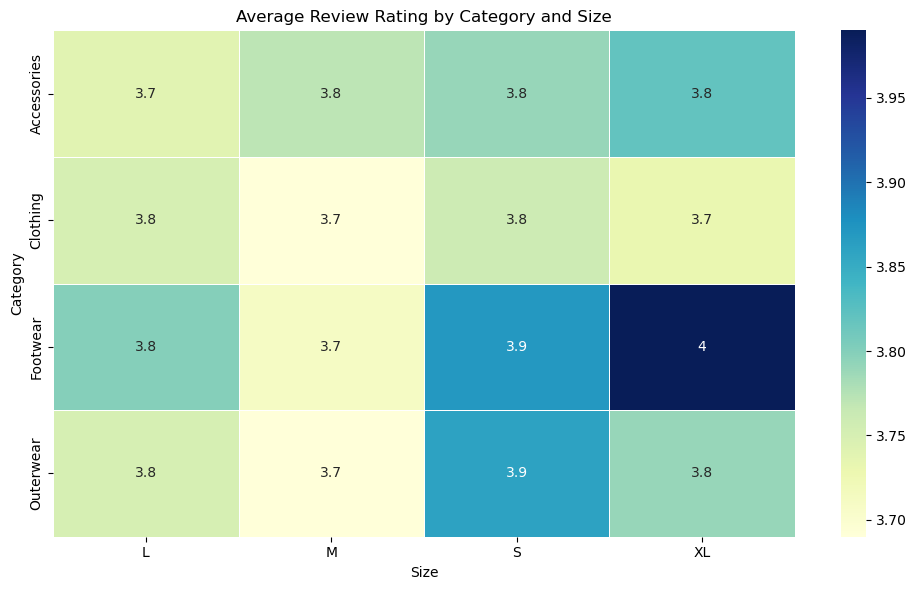

In [113]:
plt.figure(figsize=(10,6))
sns.heatmap(
    pivot_table,
    annot=True,        # show values
    cmap="YlGnBu",     # color map
    linewidths=0.5
)

plt.title("Average Review Rating by Category and Size")
plt.xlabel("Size")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


Question 7
Which combinations of Season and Shipping Type lead to the highest average Purchase Amount (USD)?

Show this as a grouped bar chart and as a heatmap.

In [114]:
pivot_avg_purchase = df.pivot_table(
    index="Season",
    columns="Shipping Type",
    values="Purchase Amount (USD)",
    aggfunc="mean"
).round(2)

print(pivot_avg_purchase)

Shipping Type  2-Day Shipping  Express  Free Shipping  Next Day Air  Standard  \
Season                                                                          
Fall                    61.93    63.16          60.66         59.77     61.38   
Spring                  58.16    57.74          61.68         58.45     56.52   
Summer                  60.09    58.34          60.47         58.24     56.90   
Winter                  63.19    62.55          58.81         58.01     58.90   

Shipping Type  Store Pickup  
Season                       
Fall                  62.64  
Spring                59.77  
Summer                56.45  
Winter                61.18  


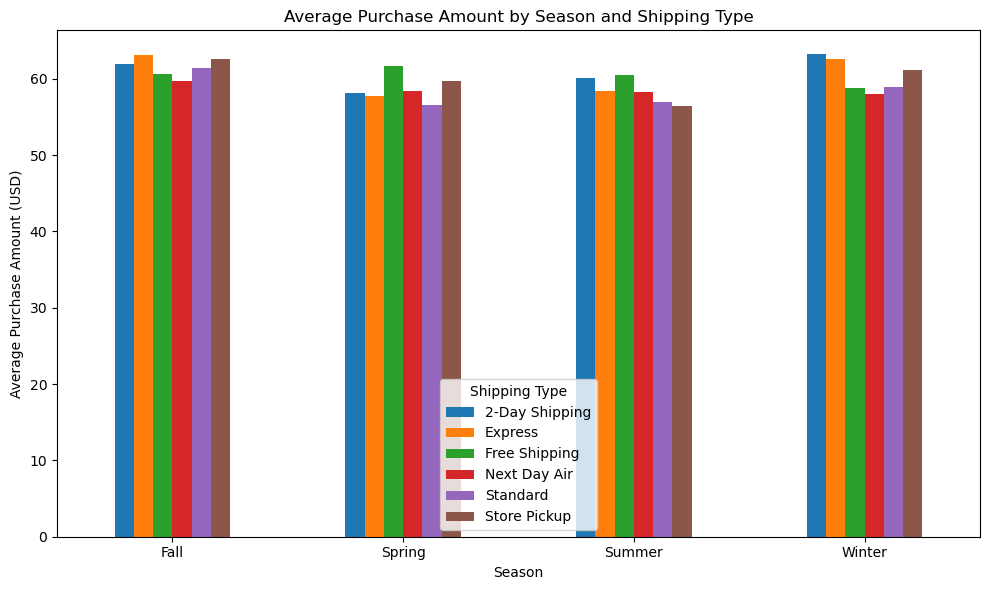

In [115]:
# Plot grouped bar chart
pivot_avg_purchase.plot(
    kind="bar",
    figsize=(10,6)
)

plt.title("Average Purchase Amount by Season and Shipping Type")
plt.xlabel("Season")
plt.ylabel("Average Purchase Amount (USD)")
plt.xticks(rotation=0)
plt.legend(title="Shipping Type")
plt.tight_layout()
plt.show()


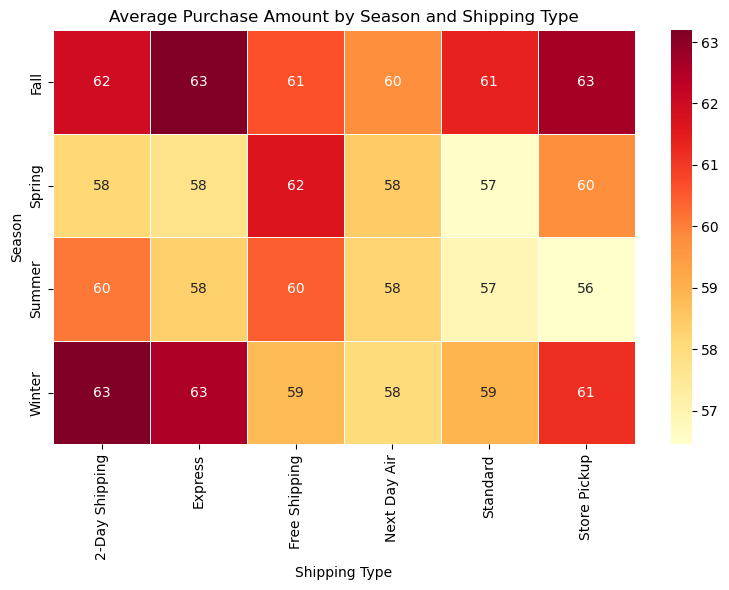

In [116]:
plt.figure(figsize=(8,6))
sns.heatmap(
    pivot_avg_purchase,
    annot=True,
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("Average Purchase Amount by Season and Shipping Type")
plt.xlabel("Shipping Type")
plt.ylabel("Season")
plt.tight_layout()
plt.show()


### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

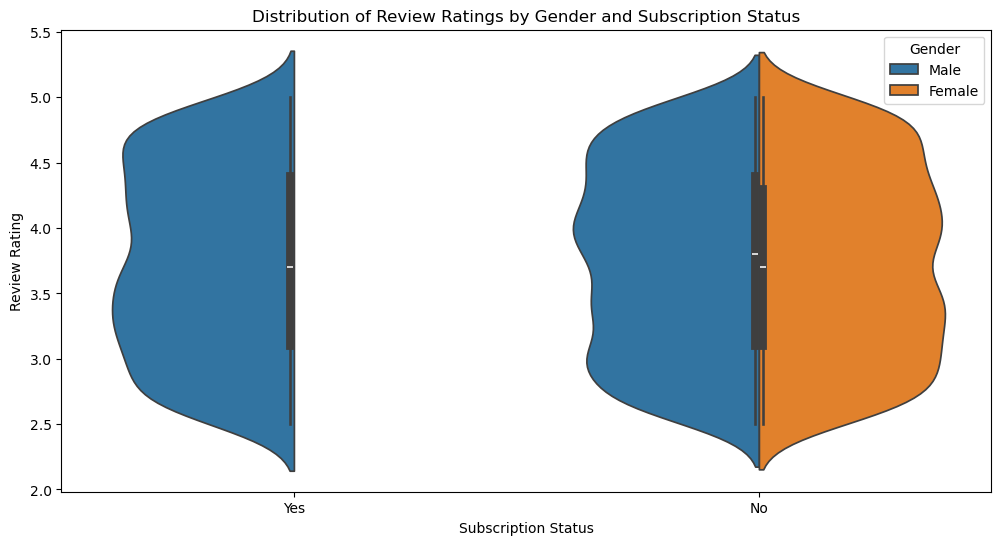

In [117]:
plt.figure(figsize=(12,6))

sns.violinplot(
    data=df,
    x="Subscription Status",
    y="Review Rating",
    hue="Gender",       
    split=True,        
)

plt.title("Distribution of Review Ratings by Gender and Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Review Rating")
plt.legend(title="Gender")
plt.show()

Question 9
What are the top 5 most purchased Item Purchased by total Purchase Amount?

Use Pandas aggregation, plot with Matplotlib pie and bar charts.

In [118]:
item_totals = df.groupby("Item Purchased")["Purchase Amount (USD)"].sum()
top5_items = item_totals.sort_values(ascending=False).head(5)
print(top5_items)

Item Purchased
Blouse     10410
Shirt      10332
Dress      10320
Pants      10090
Jewelry    10010
Name: Purchase Amount (USD), dtype: int64


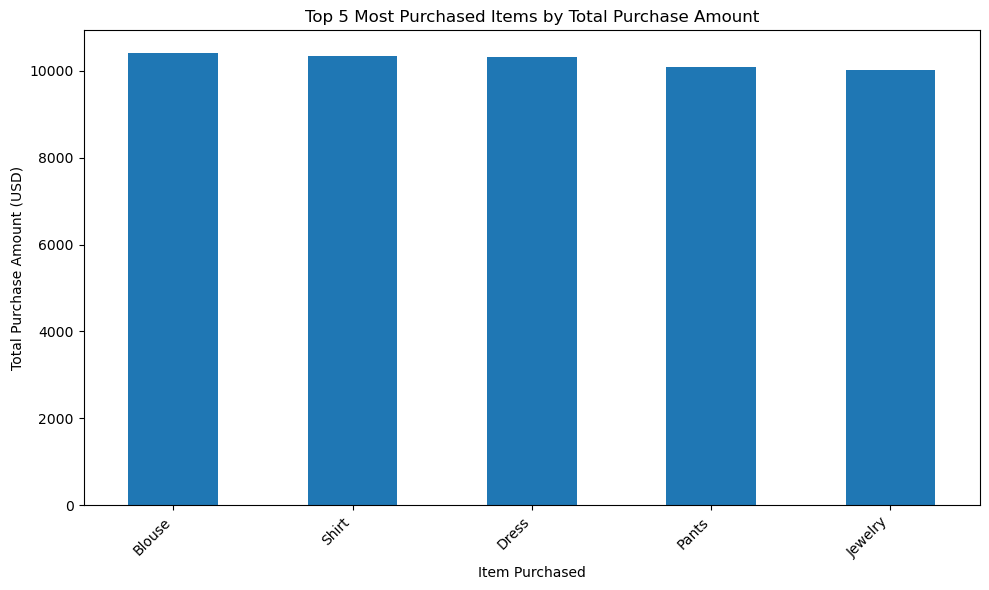

In [119]:
plt.figure(figsize=(10,6))
top5_items.plot(kind="bar")
plt.title("Top 5 Most Purchased Items by Total Purchase Amount")
plt.xlabel("Item Purchased")
plt.ylabel("Total Purchase Amount (USD)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

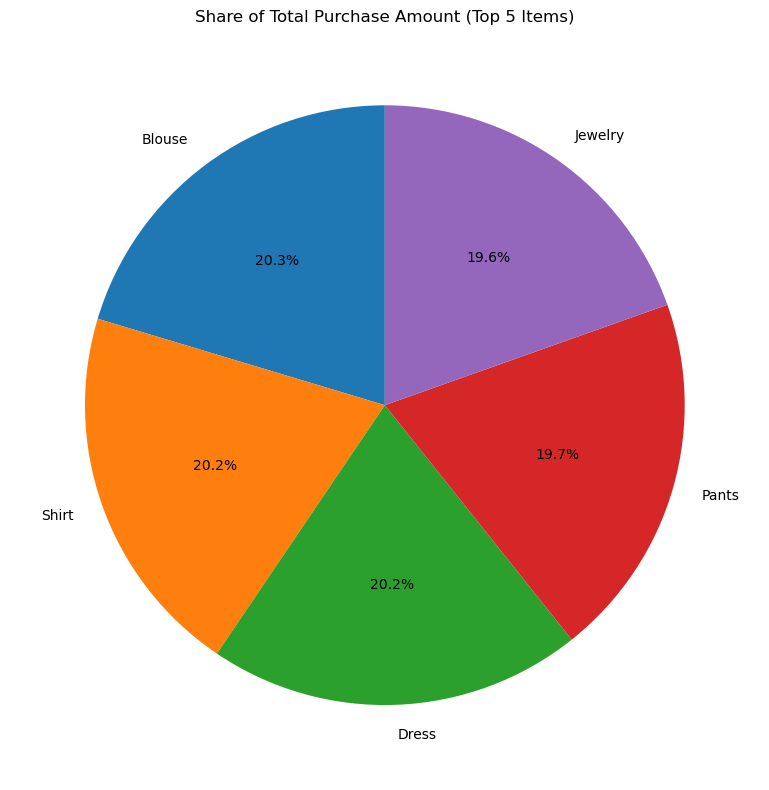

In [120]:
plt.figure(figsize=(8,8))
top5_items.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Share of Total Purchase Amount (Top 5 Items)")
plt.ylabel("")  # remove y-label
plt.tight_layout()
plt.show()


Question 10
Which Location has the highest average Purchase Amount, and how does it relate to Previous Purchases (plot only top 5 purchase amount location)?

Use a Seaborn scatterplot with size/marker variation.

In [121]:
location_avg = df.groupby("Location")["Purchase Amount (USD)"].mean().sort_values(ascending=False)
top5_locations = location_avg.head(5).index.tolist()
df_top5 = df[df["Location"].isin(top5_locations)]
df_top5.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
26,27,38,Male,Jewelry,Accessories,20,Nevada,M,Red,Spring,3.6,Yes,Next Day Air,Yes,Yes,13,Credit Card,Annually
31,32,33,Male,Dress,Clothing,79,West Virginia,L,Brown,Winter,4.7,Yes,Store Pickup,Yes,Yes,45,Venmo,Monthly
39,40,70,Male,Pants,Clothing,60,Arizona,S,Turquoise,Summer,4.2,Yes,Express,Yes,Yes,18,Credit Card,Monthly
41,42,67,Male,Scarf,Accessories,39,Alaska,M,Orange,Spring,4.5,Yes,Standard,Yes,Yes,40,Venmo,Annually


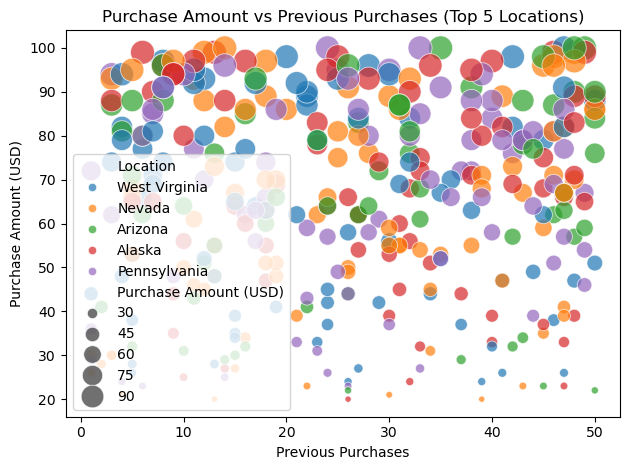

In [122]:
sns.scatterplot(
    data=df_top5,
    x="Previous Purchases",
    y="Purchase Amount (USD)",
    hue="Location",                     
    size="Purchase Amount (USD)",       
    sizes=(20, 300),                   
    alpha=0.7
)

plt.title("Purchase Amount vs Previous Purchases (Top 5 Locations)")
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.tight_layout()
plt.show()

Question 11
Using a crosstab, find how Gender and Size interact.

Plot using sns.heatmap.

In [123]:
gender_sizes = pd.crosstab(df["Gender"], df["Size"])
print(gender_sizes)

Size      L     M    S   XL
Gender                     
Female  337   590  187  134
Male    716  1165  476  295


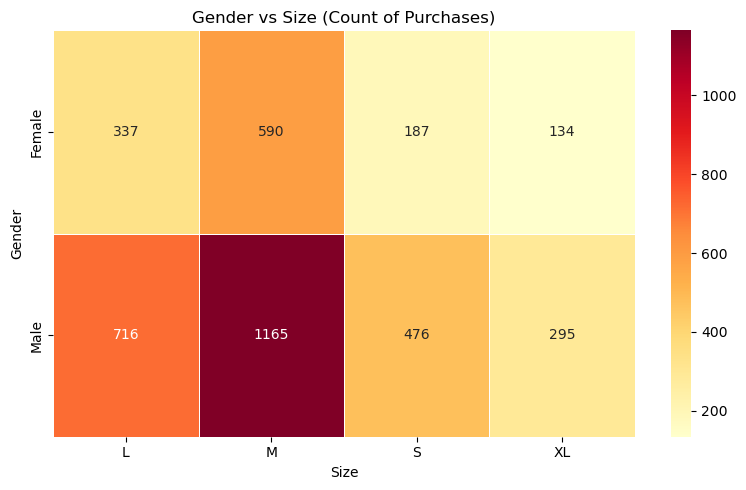

In [124]:
plt.figure(figsize=(8,5))
sns.heatmap(
    gender_sizes,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    linewidths=0.5
)
plt.title("Gender vs Size (Count of Purchases)")
plt.xlabel("Size")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

Question 12
How does the frequency of purchases column influence the use of promo codes?

Create a stacked bar chart using Matplotlib and compare with a Seaborn countplot.

In [125]:
freq_promo_ctab = pd.crosstab(df["Frequency of Purchases"], df["Promo Code Used"])
print(freq_promo_ctab)

Promo Code Used          No  Yes
Frequency of Purchases          
Annually                334  238
Bi-Weekly               321  226
Every 3 Months          326  258
Fortnightly             299  243
Monthly                 316  237
Quarterly               322  241
Weekly                  305  234


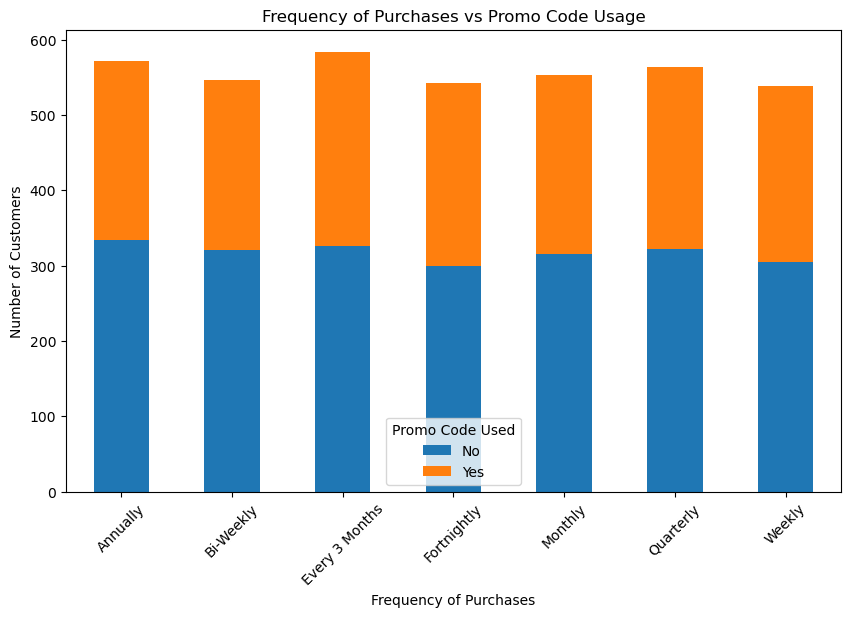

In [126]:

freq_promo_ctab.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

plt.title("Frequency of Purchases vs Promo Code Usage")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Number of Customers")
plt.legend(title="Promo Code Used")
plt.xticks(rotation=45)
plt.show()

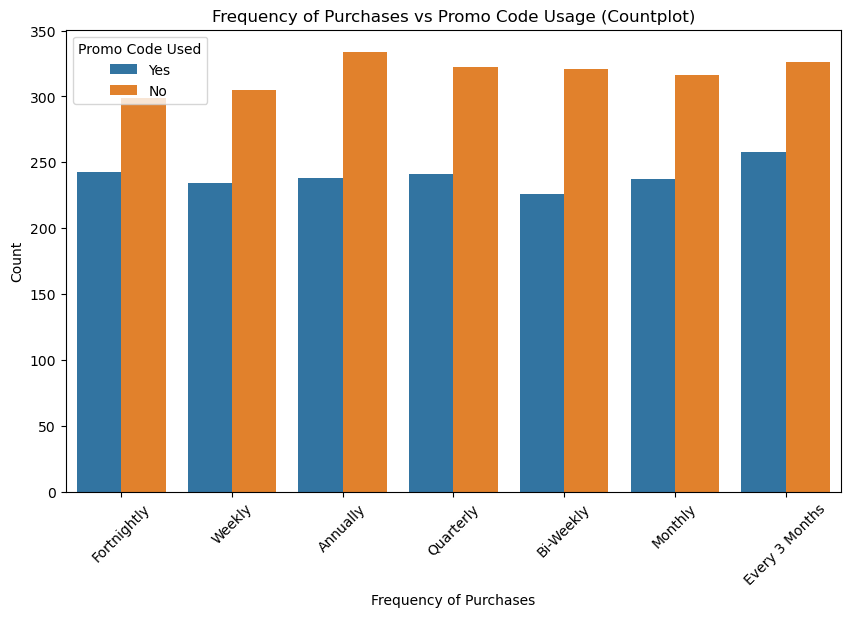

In [127]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="Frequency of Purchases",
    hue="Promo Code Used"
)

plt.title("Frequency of Purchases vs Promo Code Usage (Countplot)")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by Gender.

Use sns.pairplot with hue="Gender".

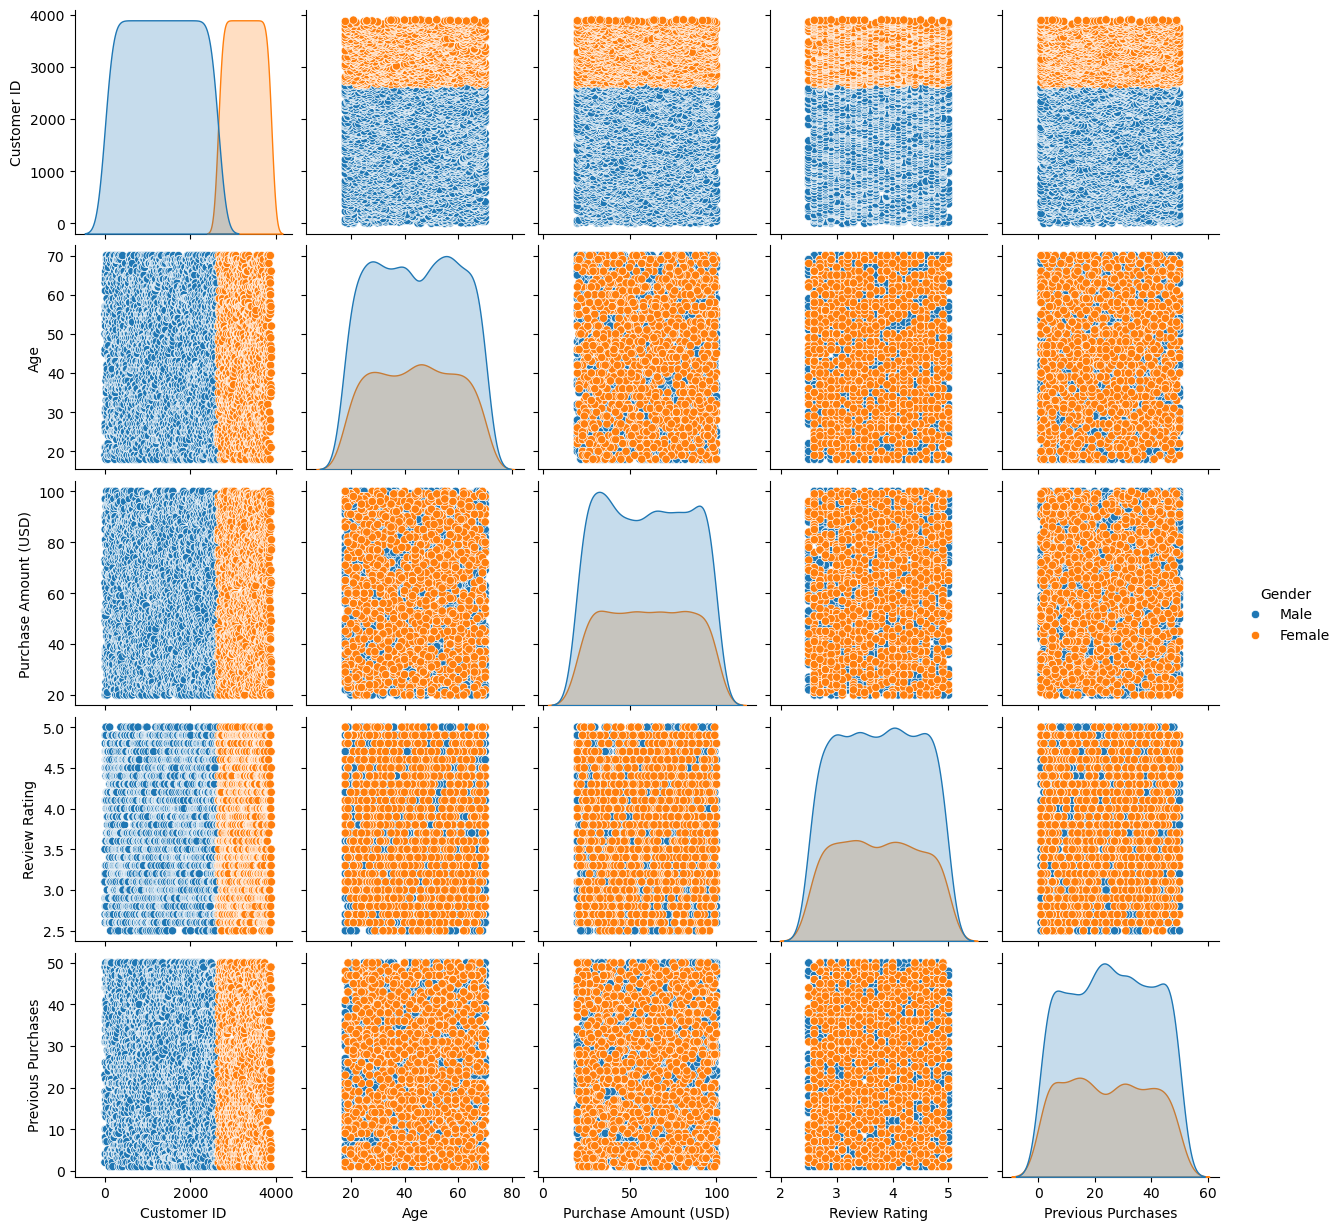

In [128]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])
numeric_cols["Gender"] = df["Gender"]

sns.pairplot(
    numeric_cols,
    hue="Gender",
)